# My Likes Report - Using Instagram Data
By: Noah Edwards using his personal Instagram Data

I created this report to analyze which accounts I liked most since downloading Instagram in 2015. I am asking this question because I am very curious to see the amount of posts I liked and which account I liked the most.

I was able to access my own personal Instagram data by downloading it from https://www.instagram.com/accounts/privacy_and_security/

### Starting

I imported json and pandas to use their libraries for Python 3

In [110]:
import json
import pandas as pd

After importing json and pandas I am loading in the instagram data I downloaded. I accessed the file data from my computer. 

In [111]:
with open(r'C:\Users\ntedw\OneDrive\Documents\Instagram Data\likes\liked_posts.json') as l:
    elikes = json.load(l)

The next several lines of code are loading in the title of the accounts, the time I liked these accounts posts, and my total number of likes. 

In [112]:
elikes.keys()

dict_keys(['likes_media_likes'])

In [113]:
type(elikes['likes_media_likes'])

list

In [114]:
elikes['likes_media_likes'][0]

{'title': 'vintagefitcadiz',
 'media_list_data': [],
 'string_list_data': [{'href': '',
   'value': 'ð\x9f\x91\x8d',
   'timestamp': 1612413771}]}

In [115]:
type(elikes['likes_media_likes'][0])

dict

Here I am loading the titles of the accounts.

In [116]:
elikes['likes_media_likes'][0]['title']

'vintagefitcadiz'

Here I am loading the exact time I liked the accounts

In [117]:
elikes['likes_media_likes'][0]['string_list_data'][0]['timestamp']

1612413771

Here I am creating "accounts" using "title" so all the titles of the accounts will be able to be accessed.

In [118]:
accounts = [x['title'] for x in elikes['likes_media_likes']]
accounts[:10]

['vintagefitcadiz',
 'thenotoriousmma',
 'vintagefitcadiz',
 'thenotoriousmma',
 'seguratom',
 'seguratom',
 'seguratom',
 'loganpaul',
 'vintagefitcadiz',
 'dustinpoirier']

Here I am using "timestamp" to be able to show the exact times I liked a specific post. 

In [119]:
timestamp = [x['string_list_data'][0]['timestamp'] for x in elikes['likes_media_likes']]
timestamp[:10]

[1612413771,
 1612410471,
 1611970614,
 1611855568,
 1611855490,
 1611805517,
 1611805103,
 1611632282,
 1611632275,
 1611512590]

Here I am using "accounts" and "timestamps" to show the exact amount of posts I've liked.

In [120]:
print(len(accounts), len(timestamp))

909 909


## Visualization

I have created charts and graphs to give a better visualization of the data provided. 

I will be explaining what each chart and graph is showing below. I will also be explaining why the specific code is being used.

This code was used to load in and show the titles and times of the last 5 accounts I liked. 

In [121]:
elikes_df = pd.DataFrame({'accounts': accounts, 'timestamp': timestamp})
elikes_df.head()

,accounts,timestamp
0,vintagefitcadiz,1612413771
1,thenotoriousmma,1612410471
2,vintagefitcadiz,1611970614
3,thenotoriousmma,1611855568
4,seguratom,1611855490


This code was used to group the title of the account with the amount of times I liked the account by using the groupby function. The chart is showing the accounts that I liked the least.  

In [122]:
count_elikes = elikes_df.groupby('accounts').count().rename(columns = {'timestamp': 'likes'})
count_elikes.head()

,likes
accounts,
1stevangelist,6
_brodey_02_,2
_carmenbrooks,1
_dae2dae_,1
_hannahh_,4


This code was used to group the title of the account with the amount of times I liked the account by using the groupby function just like the code above. However, this time it is listing the accounts I liked most in descending order as you can see in the chart.

In [123]:
count_elikes = elikes_df.groupby('accounts').count().rename(columns = {'timestamp': 'likes'}).sort_values('likes' , ascending=False)
count_elikes.head()

,likes
accounts,
vintagefitcadiz,107
thenotoriousmma,67
veronica__vaughn,48
cierrafrye25,41
cemhoff_,33


Here I imported pyplot and seaborn so I could create a graph.

In [128]:
from matplotlib import pyplot as plt
import seaborn

#### Graph 1.

This graph was created using pyplot and is being used to show how many times I liked a specific account.

The number of likes is located on the left of the graph and the titles of the accounts are located on the bottom of the graph.


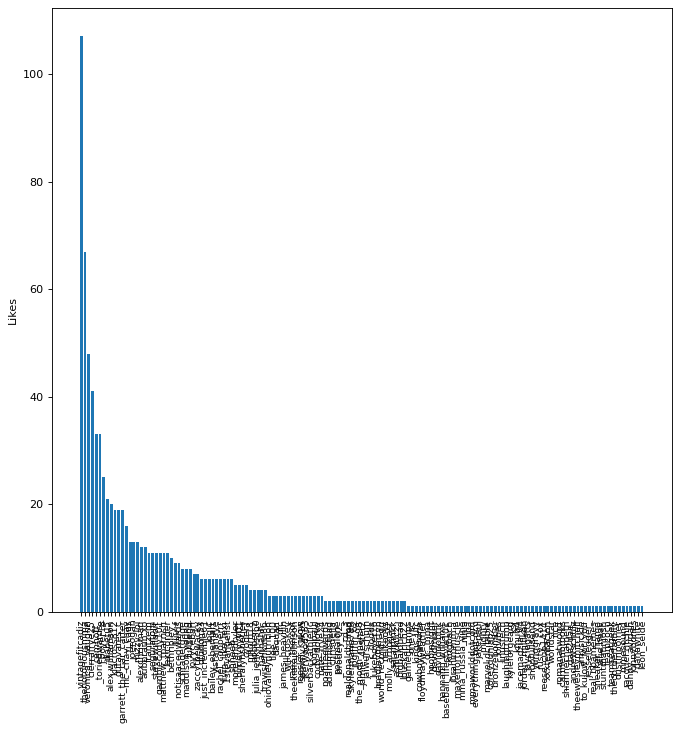

In [133]:
sortcount = count_elikes.sort_values('likes' ,ascending=False)
labels = sortcount['likes'].keys()
vals = sortcount['likes']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('Likes')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

#### Graph 2.

This graph was created using seaborn and is being used to show how many accounts I liked a specific number of times. For example the graph shows that I liked 80 accounts 1 time. 

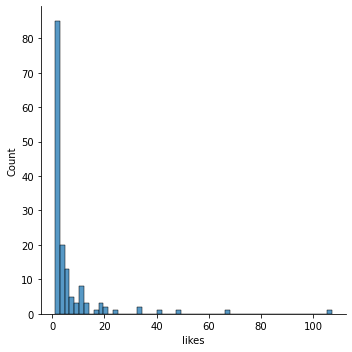

In [134]:
seaborn.displot(sortcount['likes'])

In [139]:
toplikes = count_elikes['likes'] > 10
countstop, countsbot = sortcount[toplikes], sortcount[-toplikes]
other = countsbot.sum()

piedat = countstop.append(pd.DataFrame(other['likes'], columns = ['likes'],index = ['other < 50'])).rename(columns = {'timestamp': 'likes'})
piedat.head()

<ipython-input-139-15d5edb267ac>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  countstop, countsbot = sortcount[toplikes], sortcount[-toplikes]


,likes
vintagefitcadiz,107
thenotoriousmma,67
veronica__vaughn,48
cierrafrye25,41
cemhoff_,33


#### Graph 3.

This pie chart was created using pyplot and is being used to show which accounts I liked most.

The pie chart shows my 24 most liked accounts, and groups the accounts with less likes into a category called "other". 

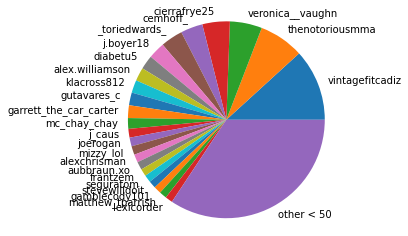

In [127]:
vals = piedat['likes']
labels = piedat['likes'].keys()


fig3, ax3 = plt.subplots()
ax3.pie(vals, labels = labels)
ax3.axis('equal')
plt.show()

# In Conclusion

### Findings

After analyzing my Instagram data we are able to answer the question of how many posts I've liked and which account I liked most. 

We can see that I liked 909 posts and the account I liked most is "vintagefitcadiz". We can also see that I liked a lot of accounts a small amount of times.

Overall we can conclude that I really "like" the account "vintagefitcadiz" and I also like to "like" an account once and move on.

Some background, "vintagefitcadiz" is an account from a gym I used to work at in my home town. I worked at this gym for 2 years and it was the best job I've had. After analyzing this data it makes sense that "vintagefitcadiz" would be the account I liked most. 

### Whats Next?

I would like to come back to this data set later on and analyze more than just the accounts I liked. Overall I am excited to continue working with data. 

